<a href="https://www.kaggle.com/code/theophilusonyejiaku/data-professionals-salary-well-detailed-eda?scriptVersionId=106758286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview
The data we will be working in this notebook is about salary of data professionals across different parts of the world. It contains the job titles, experience level, remote work ratio, company sizes, company location and residence of these professional .

In this notebook, we will be performing Exploratory data analysis of our dataset to obtain insights from our dataset.


# EXPLORATORY DATA ANALYSIS
In each of the subsequent sections, we will be answering the following questions:
1. **Question 1:** How has the salary faired over the years?
2. **Question 2:** Tell us more about the employment types and let us know how it has faired with salary over the years.
3. **Question 3:** Tell us more about the employees residence and let us know how it has faired with salary over the years.
4. **Question 4:** Tell us more about the company location and let us know how the salary varies with the company locations. Also tell how the company location has faried with respect to salaries in all the years.
5. **Question 5:** Tell us about the job titles. We will like to know who earns the most. Also, how their salary 
6. **Question 6:** Tell us more about the company sizes and their total and average salary payment over the years.



We will be importing the various libraries and modules required to achieve the objectives of this EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")



We will be loading our dataset

In [2]:
df=pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv")

In [3]:
df.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Let us check the columns out

In [4]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

We will drop the column "Unnamed: 0"

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Let us check for missing values

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing value in our dataset. Now we will check for null values in our dataset.

<AxesSubplot:>

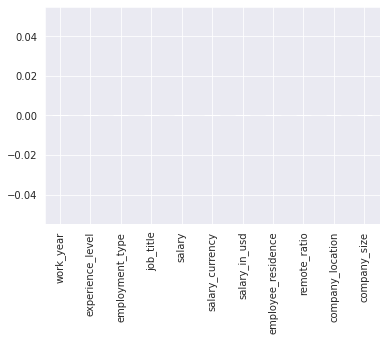

In [8]:
df.isna().sum().plot(kind="bar")

Lets the data types of our dataset variables


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


We can see that there are no missing values. Below, we will check for the distribution of our dataset.

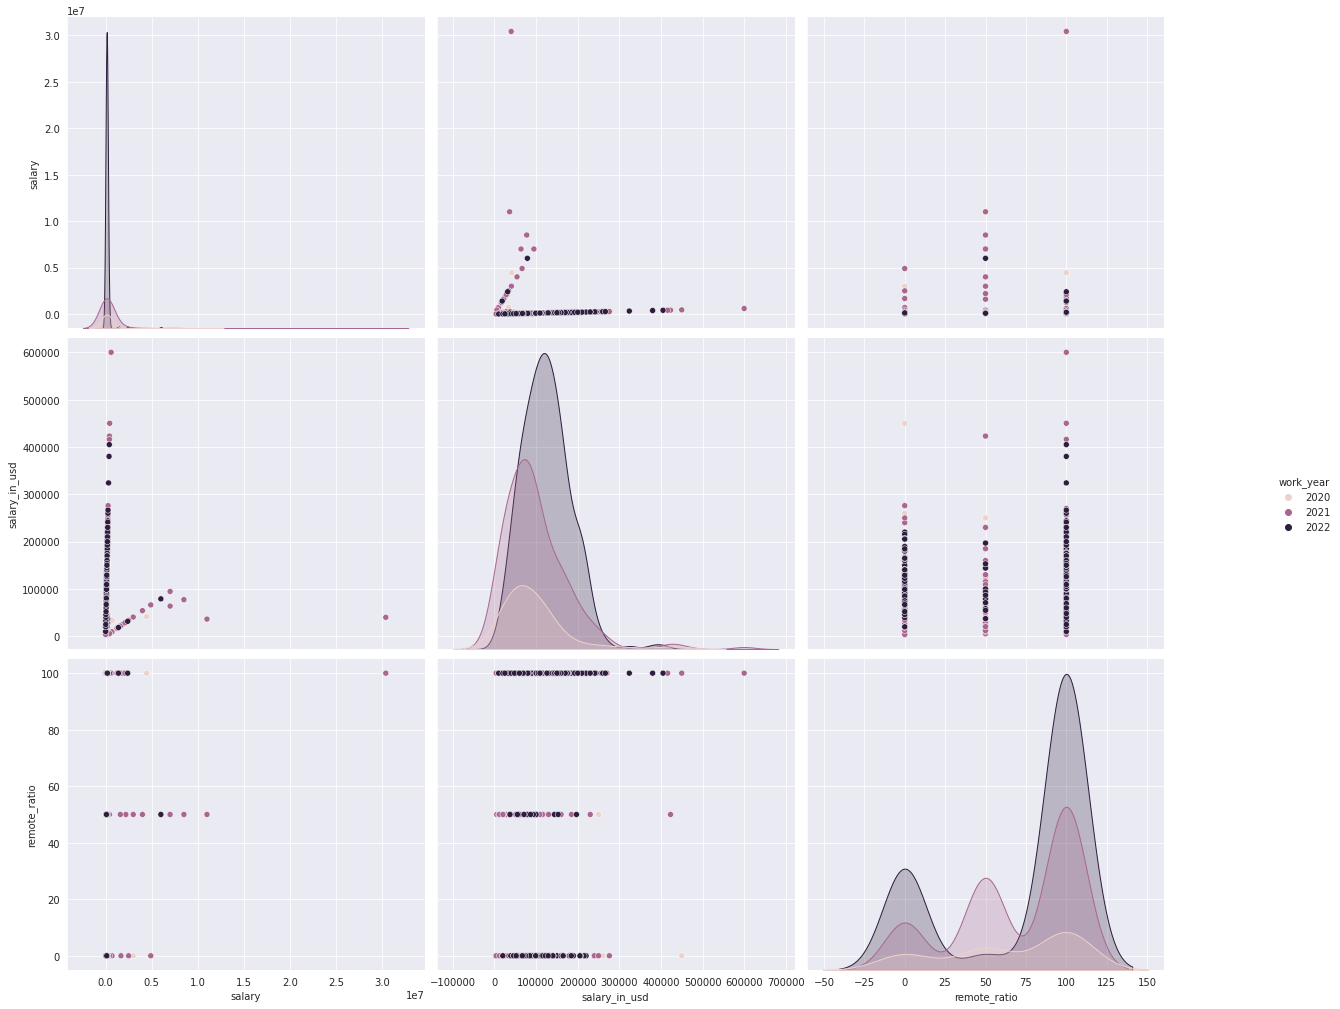

In [10]:
g = sns.pairplot(data=df, hue="work_year")
g.fig.set_size_inches(20,15)

Lets obtain the correlation in our dataset

In [11]:
correlation = df.corr()

<AxesSubplot:>

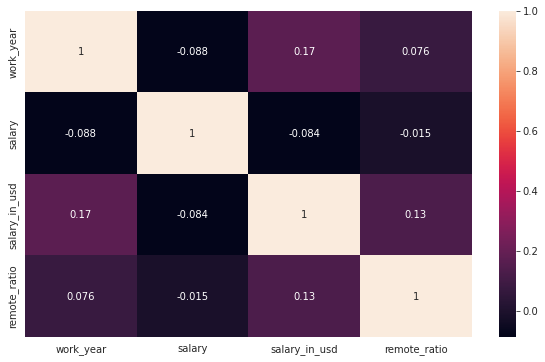

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation, annot=True)

**From the above, we can draw the following observation about our dataset:**
* **salary_in_usd**, which will be the salary variable we will be using in this analysis, is highly correlated with the **work_year** variable. The reason for this might not be far-fetched. It could mean that the salary has increased over the yearsor the opposite . We shall see by the end of our exploration.
* **salary_in_usd** also has a high correlation with **remote_ratio**. This means that working remotely or not has an impact on your salary.

# Question 1: How has the salary faired over the years?

To answer this question, we will need to obtain the total sum of salary in the respective years and show a visual representation of it. NB: We will be using the "salary_in_usd" as a variable for salary in real sense.

Even though it may sound not necessary, lets consider the value counts of years and see how biased the **"work_year"** distribution may be.

Text(0.5, 1.0, 'Value counts of work years')

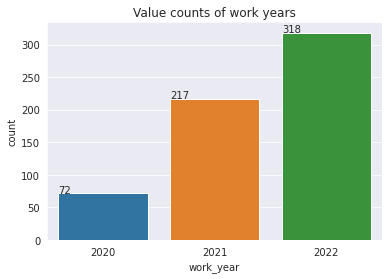

In [13]:
ax = sns.countplot(data=df["work_year"], x=df["work_year"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of work years")

We can also look at it this way:

In [14]:
df["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

We need to change this date format from **int64** to **string** format.

In [15]:
df["work_year"] = df["work_year"].astype("string")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    string
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(7), string(1)
memory usage: 52.3+ KB


We can see that 2022 has more value counts than other years. This is not really helpful to our analysis. Rather we will making use of the average salary in each of the years fot this comparison. As such, we will be presenting this on a visual as shown below:

Text(0.5, 1.0, 'Value counts of Ages')

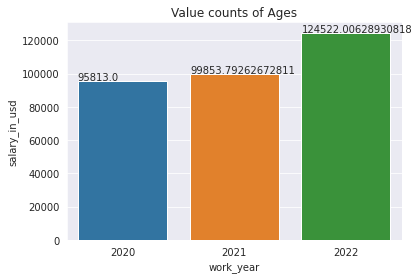

In [17]:
ax = sns.barplot(data=df.groupby("work_year")["salary_in_usd"].mean().to_frame().reset_index(), x="work_year", y="salary_in_usd")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of Ages")

# Answer to question 1
From the above we can now give an answer to the question, thus:
So far so good, the average salary across each year has been on a steady surge. With a high significant increase from 2021 to 2022.

# Question 2: Tell us more about the employment types and let us know how it has faired with salary over the years

Before we answer this question, let us explore the **"employment_type"** variable of our dataset.
We will start by taking the valuecounts of each employment type. 
NB: FT = "Full time", CT = "Contract", PT = "Part time", FL = "Freelance"
    


In [18]:
df["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Value counts of Employment types')

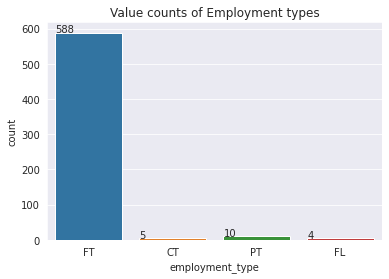

In [19]:
ax=sns.countplot(x=df["employment_type"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of Employment types")


We can also look at it, using the code below:

In [20]:
l = df.groupby("employment_type")["work_year"]
l.describe()

,count,unique,top,freq
employment_type,,,,
CT,5,3,2021,3
FL,4,3,2021,2
FT,588,3,2022,314
PT,10,3,2021,6


Below, we will look at how the employment types fair with their averge salary

Text(0.5, 1.0, 'Average Salaries of Employment types')

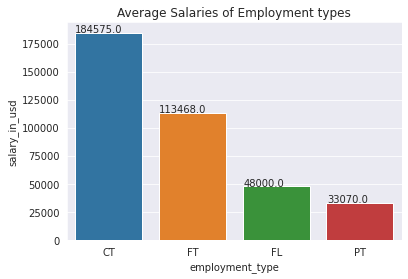

In [21]:
ax = sns.barplot(data=df.groupby("employment_type").mean().reset_index().round().sort_values(by="salary_in_usd", ascending=False), x="employment_type", y="salary_in_usd")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Average Salaries of Employment types")

Fom the above we can see the average salary of employment type in the order **CT>FT>FL>PT**. In other words a contract data scientist earns more that a fulltime, partime and freelance.


In another way round, you might want to consider the biasedness of this data (there are more Full Time job) and might want to see the salary based on this data. In that sense it is therefore required that each salary of the employment types are to be summed up for the respective emploment types. Lets show this using a visual.

**bravo!**

Text(0.5, 1.0, 'Total Salaries of Employment types')

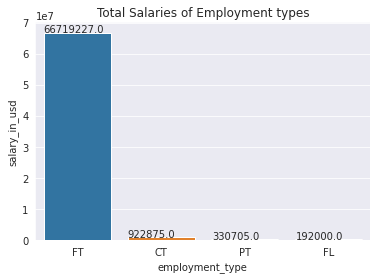

In [22]:
ax = sns.barplot(data=df.groupby("employment_type").sum().reset_index().round().sort_values(by="salary_in_usd", ascending=False), x="employment_type", y="salary_in_usd")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salaries of Employment types")

From the above, we can see that the Fulltime job pays higher than the rest. However, this is because , we did not regard the fact that our data provided with a large amount of Fulltime data scientists.

Now we will look at the average salary of the employment types and how they have faired over the years.

In [23]:
employment_types_average = df.groupby(["employment_type", "work_year"]).mean().round().reset_index()
employment_types_average.head()

,employment_type,work_year,salary,salary_in_usd,remote_ratio
0,CT,2020,100000.0,100000.0,100.0
1,CT,2021,263667.0,263667.0,100.0
2,CT,2022,29000.0,31875.0,100.0
3,FL,2020,60000.0,60000.0,100.0
4,FL,2021,16000.0,16000.0,25.0


Now lets show the visual

Text(0.5, 1.0, 'Average Salaries of Employment types over the years')

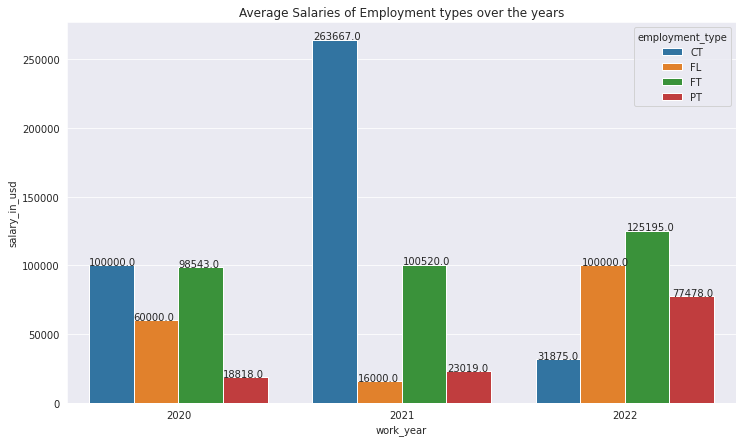

In [24]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=employment_types_average, y="salary_in_usd", x="work_year", hue="employment_type")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Average Salaries of Employment types over the years")

From the above, we can see that 
* The Contract employment type had a significant increase in salary in the year 2021 from 2020, at this point they earn much more than any employment type in any of the years.  However in the year current year 2022, contract employments no longer earn as much as in the year 2020 and they as well earn the lowest.
* Freelancing is at its all time high in the year 2022. Its all time low in salary earning was in the year 2021. Meaning that currently, they are highly paid.
* FullTime jobs has its all time low in salary earning in the year 2020, and has been on a progressive increase over the years.
* Partime jobs follows the same pattern as the fulltime jobs. Progressively on the increase each year.

We will also want to look at it in such a way that we take the total summation of every employment types' salary over the years.

In [25]:
employment_types_total = df.groupby(["employment_type", "work_year"]).sum().round().reset_index()


Text(0.5, 1.0, 'Total Salaries of Employment types over the years')

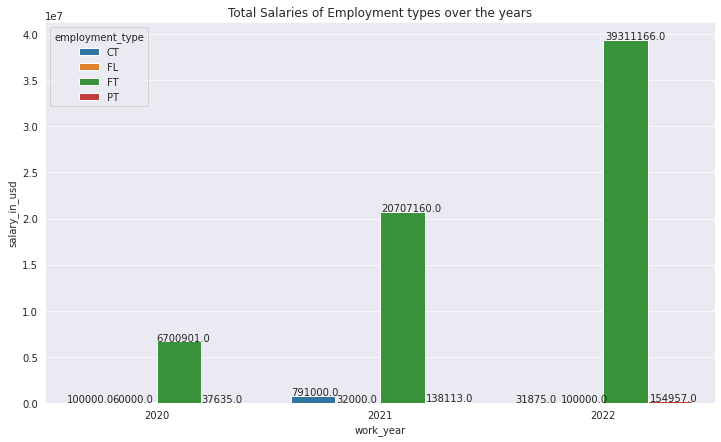

In [26]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=employment_types_total, y="salary_in_usd", x="work_year", hue="employment_type")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salaries of Employment types over the years")

From the above, we can see that the fulltime jobs has been the highest paid right from time. It has witnessed a steady increase in salary earning. The contract jobs witnessed its all time highest salaring earning in the year 2021. In this current year 2022, the contract jobs earns the lowest. Slightly above the contract jobs in salary earning is the freelance, and then slightly above the freelance is the parttime jobs.

# Answer to question 2
**A. In terms of the average salary across the employment types:**
1. In terms of the average salary earning across employment types being given in our dataset, it follows in the order: Contract > Fulltime > Freelance > parttime. In other words a contract data scientist earns more that a fulltime, partime and freelance based on average salary earing over each of the employment types.
2. Based on the data given (the fulltime job has more value counts than the rest) the summation of all the total payment shows that fulltime job earns way higher than all the other employment types combined together. Following closely to the fulltime job is the contract type which ranks very low in salary earning. The contract type slightly earn above the parttime, which inturn earns above the freelance.

**B. In terms of the  average salary across the employment types over the years:**
1. The Contract employment type had a significant increase in salary in the year 2021 from 2020, at this point they earn much more than any employment type in any of the years.  However in the current year 2022, contract employments no longer earn as much as in the year 2020 as they currently earn the lowest.
2. Freelancing is at its all time high in the year 2022. Its all time low in salary earning was in the year 2021. Meaning that currently, they are highly paid. They are currently
3. Fulltime jobs has its all time low in salary earning in the year 2020, and has been on a progressive increase over the years.
4. Partime jobs follows the same pattern as the fulltime jobs. Progressively on the increase each year.

**C. In terms of the total solary across the employment types over the years:**

The fulltime jobs has been the highest paid right from time. It has witnessed a steady increase in salary earning. The contract jobs witnessed its all time highest salaring earning in the year 2021. In this current year 2022, the contract jobs earns the lowest. Slightly above the contract jobs in salary earning is the freelance, and then slightly above the freelance is the parttime jobs.

# Question 3: Tell us more about the residence employees and let us know how it has faired with salary over the years

Firstly, we will start by exploring our **"employee_residence"** variable of our dataset. 
We will begin by taking a look at the unique value counts of the variable, and later on take a good look at the salary, both in average and in total of the **"salary_in_usd"**

In [27]:
print(df["employee_residence"].value_counts())
len(df["employee_residence"].value_counts())

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64


57

From the output above, we can that there are many unique values of the variable. USA seems to have more of the employees in this dataset. Therefore, we wll only make use of the residence that appears above 10 because of our visuals. Lets start by grouping based on the sum total of salary across each residence in all the years.

In [28]:
residence_total = df.groupby(["employee_residence", "work_year"]).sum().reset_index()
residence_total

,employee_residence,work_year,salary,salary_in_usd,remote_ratio
0,AE,2020,115000,115000,0
1,AE,2022,185000,185000,200
2,AR,2022,60000,60000,100
3,AT,2020,145000,165367,50
4,AT,2022,59000,64849,0
...,...,...,...,...,...
88,UA,2021,13400,13400,100
89,US,2020,3936550,3936550,2150
90,US,2021,13533925,13533925,6700
91,US,2022,32264736,32061972,16800


In [29]:
US = residence_total.loc[residence_total["employee_residence"]=="US"]
GB = residence_total.loc[residence_total["employee_residence"]=="GB"]
IN = residence_total.loc[residence_total["employee_residence"]=="IN"]
CA = residence_total.loc[residence_total["employee_residence"]=="CA"]
DE = residence_total.loc[residence_total["employee_residence"]=="DE"]
FR = residence_total.loc[residence_total["employee_residence"]=="FR"]
ES = residence_total.loc[residence_total["employee_residence"]=="ES"]
GR = residence_total.loc[residence_total["employee_residence"]=="US"]
top_residence = pd.concat([US, GB, IN, CA, DE, FR, ES, GR], axis=0)
top_residence.head()

,employee_residence,work_year,salary,salary_in_usd,remote_ratio
89,US,2020,3936550,3936550,2150
90,US,2021,13533925,13533925,6700
91,US,2022,32264736,32061972,16800
32,GB,2020,233000,298854,200
33,GB,2021,756356,1001046,700


Text(0.5, 1.0, 'Total Salaries of Employee Residence over the years')

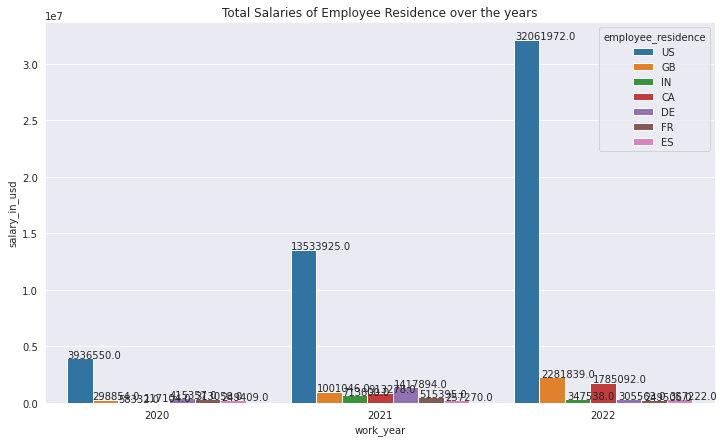

In [30]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=top_residence, y="salary_in_usd", x="work_year", hue="employee_residence")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salaries of Employee Residence over the years")

From the above:
1. We can see that employees that resides in US earns much more than their counterparts from other country

Now lets look at it in terms of average salary across each residence in all the years. We will start by grouping again and taking the mean of all salary earned.

In [31]:
residence_average = df.groupby(["employee_residence", "work_year"]).mean().round().reset_index()
residence_average.head()

,employee_residence,work_year,salary,salary_in_usd,remote_ratio
0,AE,2020,115000.0,115000.0,0.0
1,AE,2022,92500.0,92500.0,100.0
2,AR,2022,60000.0,60000.0,100.0
3,AT,2020,72500.0,82684.0,25.0
4,AT,2022,59000.0,64849.0,0.0


In [32]:
US_a = residence_average.loc[residence_average["employee_residence"]=="US"]
GB_a = residence_average.loc[residence_average["employee_residence"]=="GB"]
IN_a = residence_average.loc[residence_average["employee_residence"]=="IN"]
CA_a = residence_average.loc[residence_average["employee_residence"]=="CA"]
DE_a = residence_average.loc[residence_average["employee_residence"]=="DE"]
FR_a = residence_average.loc[residence_average["employee_residence"]=="FR"]
ES_a = residence_average.loc[residence_average["employee_residence"]=="ES"]
GR_a = residence_average.loc[residence_average["employee_residence"]=="US"]
top_residence_average = pd.concat([US_a, GB_a, IN_a, CA_a, DE_a, FR_a, ES_a, GR_a], axis=0)
top_residence_average.head()

,employee_residence,work_year,salary,salary_in_usd,remote_ratio
89,US,2020,157462.0,157462.0,86.0
90,US,2021,155562.0,155562.0,77.0
91,US,2022,146658.0,145736.0,76.0
32,GB,2020,77667.0,99618.0,67.0
33,GB,2021,63030.0,83420.0,58.0


Now let us see the visual representation of all the residents and the average salary they earn each year

Text(0.5, 1.0, 'Average Salaries of Employee Residence over the years')

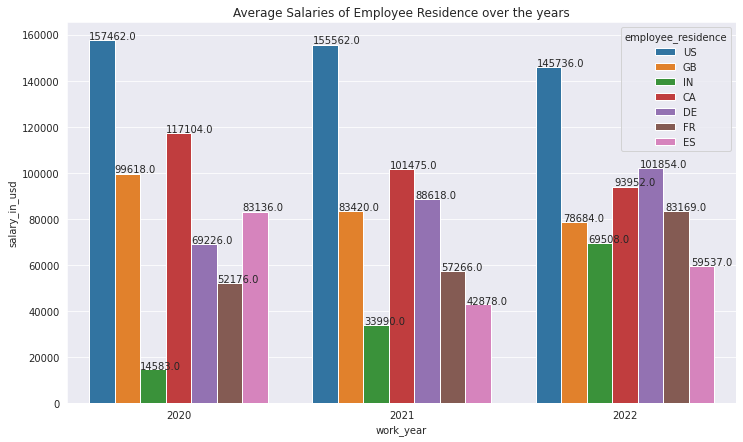

In [33]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=top_residence_average, y="salary_in_usd", x="work_year", hue="employee_residence")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Average Salaries of Employee Residence over the years")

**From the above:**

* USA residents has been the highest earners on an average. Slightly followed are the Canadians
* 3rd on the list are the spanish.And So on and so forth.

# Answer to question 3

1. We can see that employees that resides in US earns much more n total salary than their counterparts from other country.
* USA residents has been the highest salary earners on an average. Slightly followed are the Canadians
* 3rd on the list are the spanish.And So on and so forth.



# **Question 4:** Tell us more about the company location and let us know how the salary varies with the company locations. Also tell how the company location has faried with respect to salaries in all the years.


Now we will explore the company locations' variable of our dataset. Lets start by taking the value counts of the respective company_location as well as taking a total salary earning from each of the locations and representing it using a visual.

In [34]:
df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

As we can see from the output, there are many insignificant number of company locations. However, just like how we dealt with the employee residence, we will be working with those of value counts above 10.


Now let us move ahead by grouping the data.

In [35]:
location_total = df.groupby(["company_location", "work_year"]).sum().reset_index().sort_values(by="salary_in_usd", ascending=False)
location_total.head()

,company_location,work_year,salary,salary_in_usd,remote_ratio
85,US,2022,32987736,32784972,17400
84,US,2021,29362325,14057108,7550
83,US,2020,4289110,4297538,2650
35,GB,2022,1743500,2281839,1100
11,CA,2022,1864200,1685092,1300


In [36]:
US = location_total.loc[location_total["company_location"]=="US"]
GB = location_total.loc[location_total["company_location"]=="GB"]
IN = location_total.loc[location_total["company_location"]=="IN"]
CA = location_total.loc[location_total["company_location"]=="CA"]
DE = location_total.loc[location_total["company_location"]=="DE"]
FR = location_total.loc[location_total["company_location"]=="FR"]
ES = location_total.loc[location_total["company_location"]=="ES"]
GR = location_total.loc[location_total["company_location"]=="US"]
top_location_total = pd.concat([US, GB, IN, CA, DE, FR, ES, GR], axis=0)
top_location_total.head()

,company_location,work_year,salary,salary_in_usd,remote_ratio
85,US,2022,32987736,32784972,17400
84,US,2021,29362325,14057108,7550
83,US,2020,4289110,4297538,2650
35,GB,2022,1743500,2281839,1100
34,GB,2021,851356,1139663,850


Now, lets show the visual of how the total salary of all the company location has faired over the years

Text(0.5, 1.0, 'Total Salaries of company locations over the years')

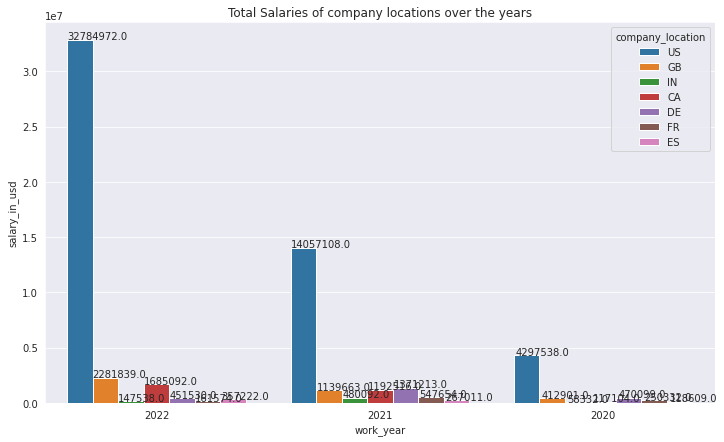

In [37]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=top_location_total, y="salary_in_usd", x="work_year", hue="company_location")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salaries of company locations over the years")

From the above:
1. we can see that companies located in the US pays more than their counterparts from other countries.
2. Following the US, is the United Kingdom.
3. 3rd on the list is Canada. 
4. Currently, the US companies pays higher salaries than their counterparts according to the data.


Now we will be looking at it with respect to the average salary earning from the various company locations.

In [38]:
location_average = df.groupby(["company_location", "work_year"]).mean().round().reset_index()
location_average.head()

,company_location,work_year,salary,salary_in_usd,remote_ratio
0,AE,2020,115000.0,115000.0,0.0
1,AE,2022,92500.0,92500.0,100.0
2,AS,2021,1335000.0,18053.0,100.0
3,AT,2020,72500.0,82684.0,25.0
4,AT,2021,52000.0,61467.0,50.0


Just like we previously did, we only will consider the countries with value counts above 10.

In [39]:
US = location_average.loc[location_average["company_location"]=="US"]
GB = location_average.loc[location_average["company_location"]=="GB"]
IN = location_average.loc[location_average["company_location"]=="IN"]
CA = location_average.loc[location_average["company_location"]=="CA"]
DE = location_average.loc[location_average["company_location"]=="DE"]
FR = location_average.loc[location_average["company_location"]=="FR"]
ES = location_average.loc[location_average["company_location"]=="ES"]
GR = location_average.loc[location_average["company_location"]=="US"]
top_location_average = pd.concat([US, GB, IN, CA, DE, FR, ES, GR], axis=0)
top_location_average.head()

,company_location,work_year,salary,salary_in_usd,remote_ratio
83,US,2020,142970.0,143251.0,88.0
84,US,2021,296589.0,141991.0,76.0
85,US,2022,145963.0,145066.0,77.0
33,GB,2020,83250.0,103225.0,75.0
34,GB,2021,60811.0,81404.0,61.0


Now, lets show the visual representation of how the average salary of all the company location has faired over the years.

Text(0.5, 1.0, 'Average Salaries of Company Locations over the years')

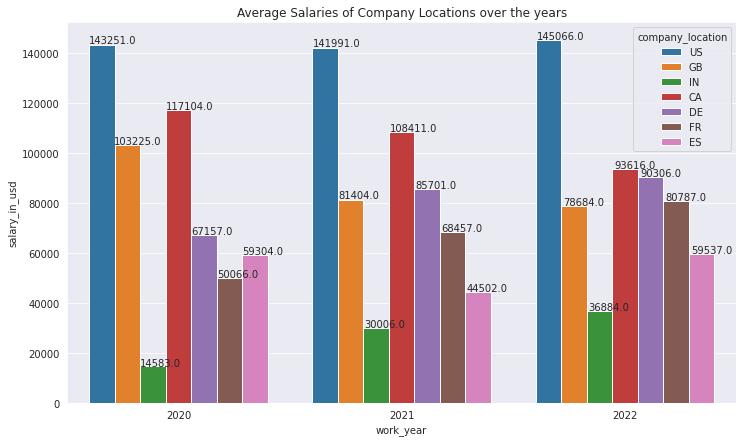

In [40]:
plt.figure(figsize=(12,7))
ax=sns.barplot(data=top_location_average, y="salary_in_usd", x="work_year", hue="company_location")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Average Salaries of Company Locations over the years")

From above we can see that:
1. US companies on an average pays the highest salaries in all the respective years, followed by the Canada and the United Kingdom
2. We can also see that US companies has always maitained a range in its average salary payments.
3. Canadian and English companies over the years has showed a decrease in their salary payments unlike Germany(DE) whose companies has raised the bar in the salary payment in every consecutive year.
4. India, France, Spain have also raised the bar in each consecutive year.


# Answer to question 4
**A. In terms of the Total salary across the company locations:**
1. US companies on an average pays the highest salaries in all the respective years, followed by the Canada and the United Kingdom
2. We can also see that US companies has always maitained a range in its average salary payments.
3. Canadian and English companies over the years has showed a decrease in their salary payments unlike Germany(DE) whose companies has raised the bar in the salary payment in every consecutive year.
4. India, France, Spain have also raised the bar in each consecutive year.

**A. In terms of the Average salary payment across the company locations:**
1. we can see that datascientists who work at companies located in the US earns more than every other company located in other areas.
2. Following the US is the United Kingdom.
3. 3rd on the list is Canada. 
4. Currently, the US companies pays higher salaries than their counterparts according to the data.


# **Question 5:**  Tell us about the job titles. We will like to know who earns the most. Also, how their salary has faired over the years.

To answer this question, we will explore the "job_title" variable of our dataset.

In [41]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

We can see from the above that we have more of Data Scientist, Data Engineer,Data Analyst, Machine Learning Engineer, Research Scientist, Data Science Manager,Data Architect, Big Data Engineer, Machine Learning Scientist tops the list of most job titles in the data.

Lets show the plot

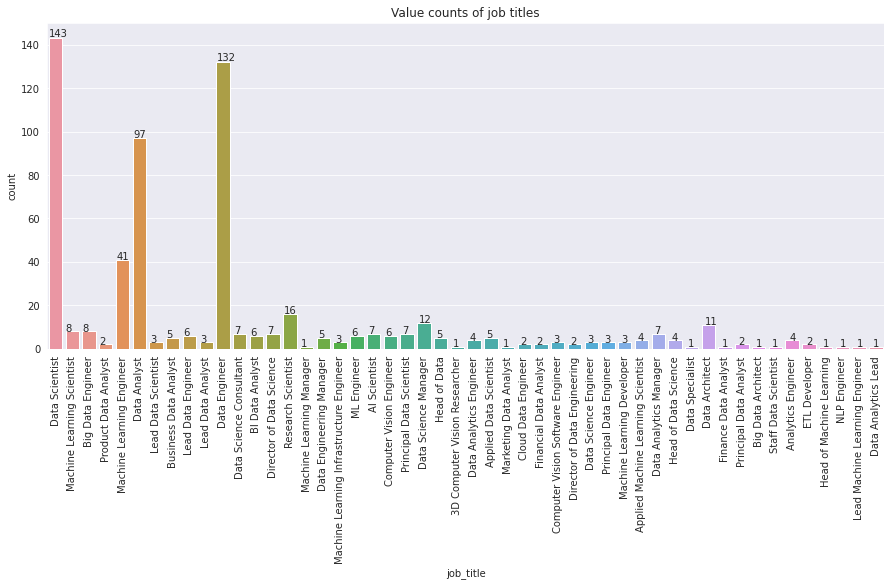

In [42]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x=df["job_title"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of job titles")
plt.xticks(rotation=90)
plt.show()

From the visual above:
1. Data scientist is the most frequent job title in the dataset, and is followed closely by Data Engineers.
2. 3rd most populated is the Data Analysts. And then, the Machine Learning Engineer.

Now let us compare the total salary of each of the job titles. This process, like I had already mentioned, will not give a good conclusion with regards to the average salary of each job titles. Let us start with grouping.


In [43]:
job_titles_total=df.groupby(["job_title"]).sum().round().reset_index().sort_values(by="salary_in_usd", ascending=False)
job_titles_total.head()


,job_title,salary,salary_in_usd,remote_ratio
22,Data Scientist,72693650,15470860,9150
17,Data Engineer,23655793,14879700,9900
12,Data Analyst,9370681,9010627,7300
38,Machine Learning Engineer,11181433,4300086,2750
16,Data Architect,1956613,1956613,1100


Now we show the visual.

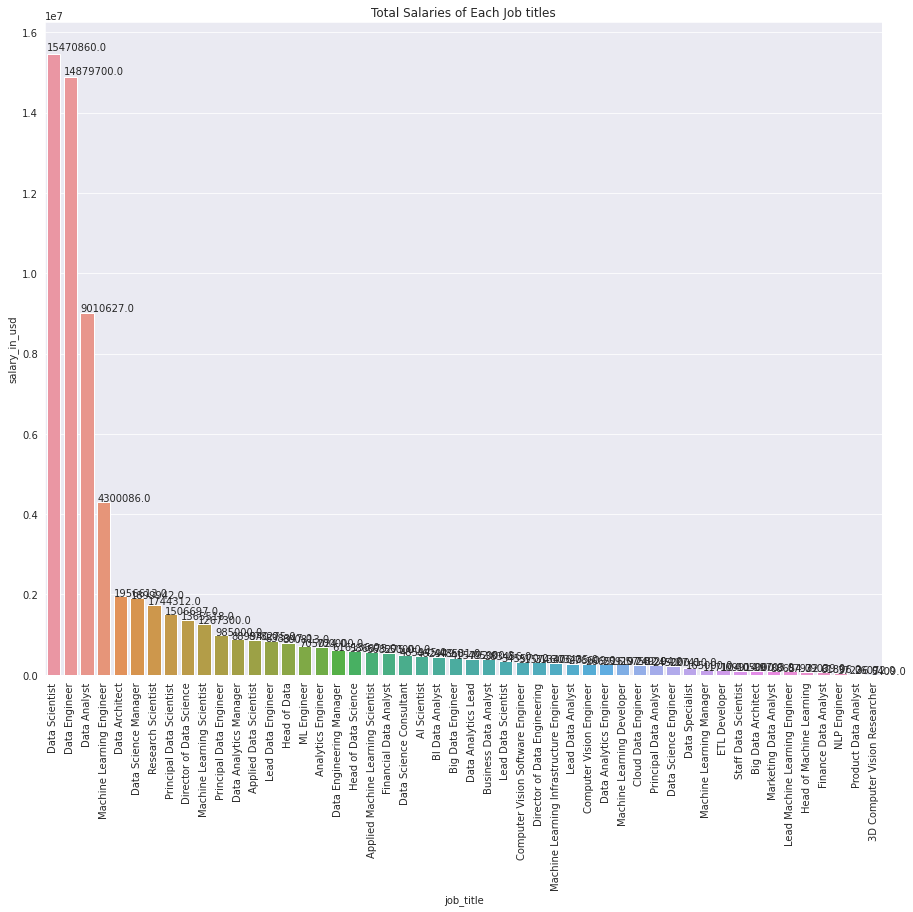

In [44]:
plt.figure(figsize=(15,12))
ax = sns.barplot(data=job_titles_total, x="job_title", y="salary_in_usd")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=90)
plt.title("Total Salaries of Each Job titles")
plt.show()

    From the above we can see that:
1. The Data Scientist job title earns more than all other job titles. We must not forget that not taking the average of their total salary will not give us a correct estimate of who earns more between all the job titles.
2. Followed closely to the Data Scientist as the highest paid is the Data Engineer and then, the Data Analyst. 
3. The least paid job title is the 3D Computer vision researcher. 

This conclusions will not be favourable to job titles that do no appear frequently. Hence the need to take their average salary earnings.

Now taking the average.

In [45]:
job_titles_average =  df.groupby(["job_title"]).agg("mean").reset_index().sort_values(by="salary_in_usd", ascending=False)
job_titles_average.head(10)

,job_title,salary,salary_in_usd,remote_ratio
14,Data Analytics Lead,405000.000000,405000.000000,100.000000
45,Principal Data Engineer,328333.333333,328333.333333,100.000000
28,Financial Data Analyst,275000.000000,275000.000000,75.000000
46,Principal Data Scientist,206714.285714,215242.428571,85.714286
25,Director of Data Science,193285.714286,195074.000000,42.857143
16,Data Architect,177873.909091,177873.909091,100.000000
3,Applied Data Scientist,172400.000000,175655.000000,70.000000
2,Analytics Engineer,175000.000000,175000.000000,50.000000
23,Data Specialist,165000.000000,165000.000000,100.000000
29,Head of Data,156400.000000,160162.600000,90.000000


Now lets show the visual

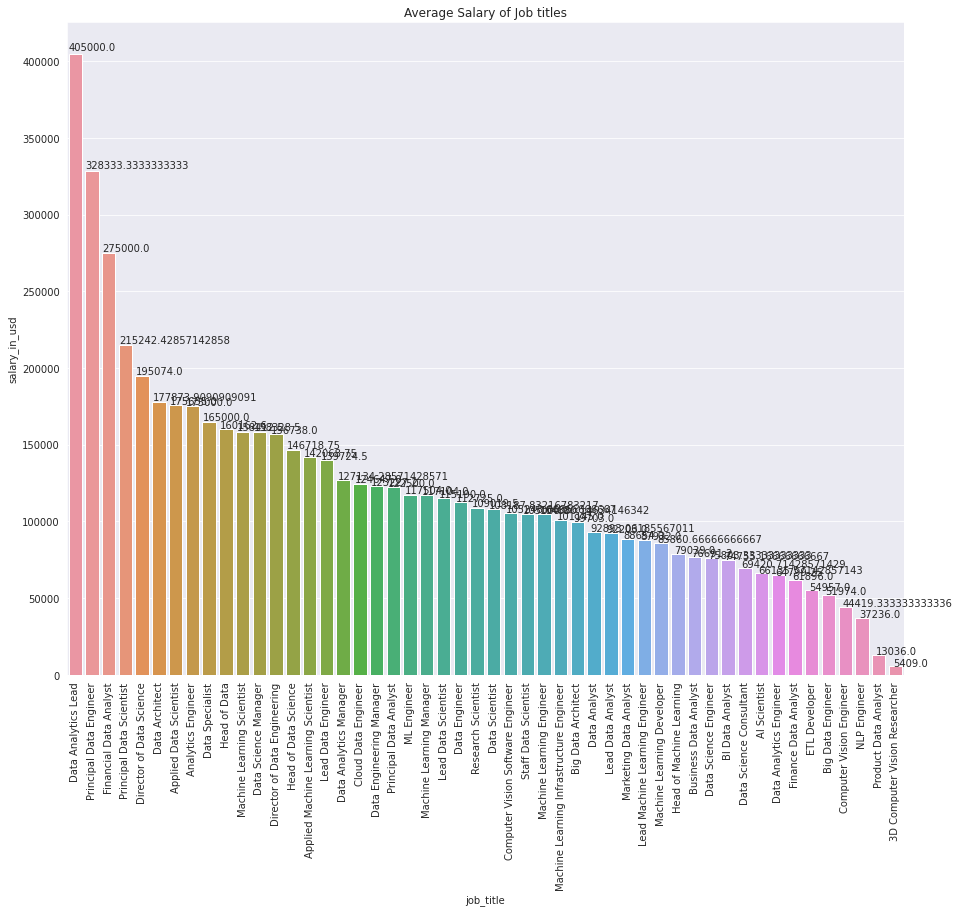

In [46]:
plt.figure(figsize=(15,12))
ax = sns.barplot(data=job_titles_average, x="job_title", y="salary_in_usd")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=90)
plt.title("Average Salary of Job titles")
plt.show()

From the above:
1. On an average, the Data Analytics Lead earns the highest salary earning of 405,000 in US dollars.
2. 2nd on the list is the Principal Data Engineer who earns 328,000 in US dollars. 
3. 3rd on the list is the Financial Data Analyst who earns an average of 215,000 in US dollars.
4. The least paid is the 3D computer Vission Researcher.

Now we want to look at the top 5 earners on an average and see how their salaries have faired over the years.

In [47]:
job_titles_average.head(5)

,job_title,salary,salary_in_usd,remote_ratio
14,Data Analytics Lead,405000.000000,405000.000000,100.000000
45,Principal Data Engineer,328333.333333,328333.333333,100.000000
28,Financial Data Analyst,275000.000000,275000.000000,75.000000
46,Principal Data Scientist,206714.285714,215242.428571,85.714286
25,Director of Data Science,193285.714286,195074.000000,42.857143


In [48]:
# Using the Acronyms as their variable
DAE = df.loc[df["job_title"]=="Data Analytics Lead"]
PDA = df.loc[df["job_title"]=="Principal Data Engineer"]
FDA = df.loc[df["job_title"]=="Financial Data Analyst"]
PDS = df.loc[df["job_title"]=="Principal Data Scientist"]
DDS = df.loc[df["job_title"]=="Director of Data Science"]
top_5 = pd.concat([DAE, PDA, FDA, PDS, DDS], axis=0)
top_5.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
121,2021,SE,FT,Principal Data Engineer,200000,USD,200000,US,100,US,M


In [49]:
top_5["job_title"].unique()

array(['Data Analytics Lead', 'Principal Data Engineer',
       'Financial Data Analyst', 'Principal Data Scientist',
       'Director of Data Science'], dtype=object)

Now we will proceed with grouping them 

In [50]:
top_5 = top_5.groupby(["work_year", "job_title"]).sum().round().reset_index()
top_5

,work_year,job_title,salary,salary_in_usd,remote_ratio
0,2020,Director of Data Science,325000,325000,100
1,2020,Principal Data Scientist,130000,148261,100
2,2021,Director of Data Science,778000,843539,150
3,2021,Financial Data Analyst,450000,450000,100
4,2021,Principal Data Engineer,985000,985000,300
5,2021,Principal Data Scientist,1169000,1195762,400
6,2022,Data Analytics Lead,405000,405000,100
7,2022,Director of Data Science,250000,196979,50
8,2022,Financial Data Analyst,100000,100000,50
9,2022,Principal Data Scientist,148000,162674,100


In [51]:
top_5["job_title"].unique()

array(['Director of Data Science', 'Principal Data Scientist',
       'Financial Data Analyst', 'Principal Data Engineer',
       'Data Analytics Lead'], dtype=object)

Now lets show the visual of the top 5 highest average earning job titles faired over the years.

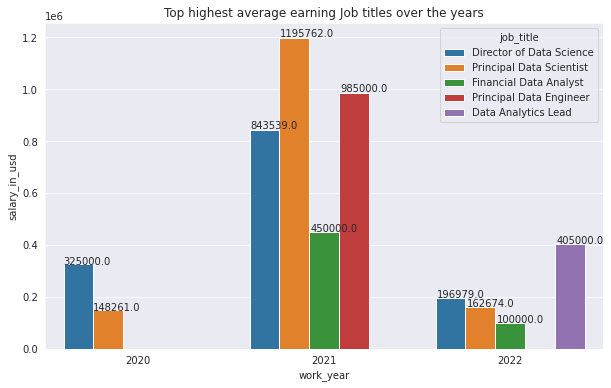

In [52]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_5, x="work_year", y="salary_in_usd", hue="job_title")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Top highest average earning Job titles over the years")
plt.show()

**From the above, we can see that:**
1. In the current year, Data Analytics lead earns highest, followed by Director of Data Science and then the principal data scientist.
2. The Director of Data Science job title has witnessed a rapid decrease in its earning from 2021 to 2022.
So and so forth. 

We can see that taking the average salary earning of the job titles will not give us a real and correct conclusion as most of these highest average earners appeared a few times in our dataset.

We might want to look at it based on the total sum of salary earned by various job titles.

In [53]:
job_titles_total.head(5)

,job_title,salary,salary_in_usd,remote_ratio
22,Data Scientist,72693650,15470860,9150
17,Data Engineer,23655793,14879700,9900
12,Data Analyst,9370681,9010627,7300
38,Machine Learning Engineer,11181433,4300086,2750
16,Data Architect,1956613,1956613,1100


In [54]:
# Using the Acronyms as their variable
DS = df.loc[df["job_title"]=="Data Scientist"]
DE = df.loc[df["job_title"]=="Data Engineer"]
DA = df.loc[df["job_title"]=="Data Analyst"]
MLE = df.loc[df["job_title"]=="Machine Learning Engineer"]
DAR = df.loc[df["job_title"]=="Data Architect"]
total_top_5 = pd.concat([DS, DE, DA, MLE, DAR], axis=0)
total_top_5.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L


In [55]:
total_top_5["job_title"].unique()

array(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Data Architect'], dtype=object)

Now lets show the visual of the total highest salary earners and how they have faired over the years.

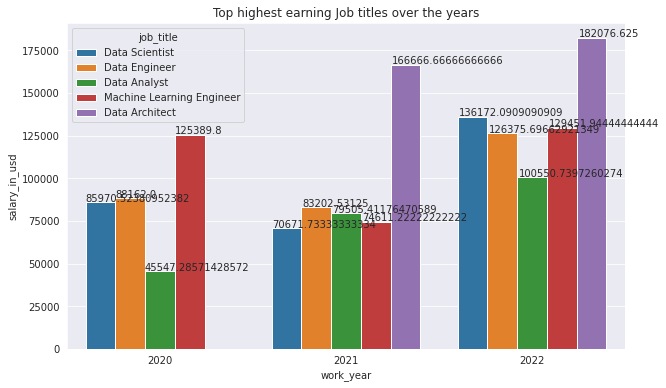

In [56]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_top_5, x="work_year", y="salary_in_usd", hue="job_title", ci=None)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Top highest earning Job titles over the years")
plt.show()

**From the above, we can see that:**
1. In the past year, 2021, and in the current year, Data Architects earns the highest.
2. In the current year, 2022, Data Scientists are 2nd on the list as the highest earners.
3. Data Analysts has seen a rapid increase in salary in each consecutive years.
So on and so forth.


# Answer to question 5

* Data scientist is the most frequent job title in the dataset, and is followed closely by Data Engineers.
* 3rd most populated is the Data Analysts. And then, the Machine Learning Engineer.

**A. In terms of Total Salary earneing by various job titles in the dataset:**
1. The **Data Scientist** job title earns the highest of all the job titles. We must not forget that not taking the average of their total salary will not give us a correct estimate of who earns more between all the job titles.
2. Followed closely to the Data Scientist as the highest paid is the **Data Engineer** and then, the Data Analyst. 
3. The least paid job title is the 3D Computer vision researcher. 
4. In the past year, 2021, and in the current year, Data Architects earns the highest.
5. In the current year, 2022, Data Scientists are 2nd on the list as the highest earners.
6. Data Analysts has seen a rapid increase in salary in each consecutive years.
So on and so forth.


This conclusions will not be favourable to job titles that do no appear frequently. Hence the need to take their average salary earnings.

**B. In terms of Average Salary earning by various job titles in the dataset:**
1. On an average, the **Data Analytics Lead** earns the highest salary earning of 405,000 in US dollars. Although, it appeard once in our dataset.
2. 2nd on the list is the **Principal Data Engineer** who earns 328,000 in US dollars. 
3. 3rd on the list is the **Financial Data Analyst** who earns an average of 215,000 in US dollars.
4. The least paid is the 3D computer Vission Researcher.
5. In the current year, Data Analytics lead earns highest, followed by Director of Data Science and then the principal data scientist.
6. . The Director of Data Science job title has witnessed a rapid decrease in its earning from 2021 to 2022.
So and so forth.
    

# **Question 6:** Tell us more about the company sizes and their total and average salary payment over the years.


We will begin by exploring the Company sizes. Their unique value counts, their total salary payment over the years and as well, their average salary payment over the years.

In [57]:
df["company_size"].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

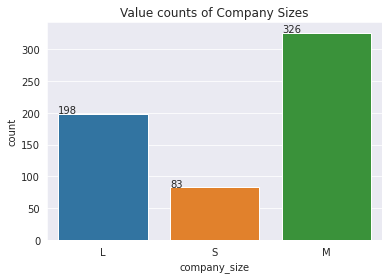

In [58]:
ax = sns.countplot(x=df["company_size"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Value counts of Company Sizes")
plt.show()

In [59]:
company_sizes= df.groupby(["company_size", "work_year"]).sum().round().reset_index().sort_values(by="salary_in_usd", ascending=False)
company_sizes

,company_size,work_year,salary,salary_in_usd,remote_ratio
5,M,2022,34773236,32564433,19150
1,L,2021,85015272,14070126,8100
2,L,2022,14710000,6031960,3150
4,M,2021,10761749,3930204,3700
7,S,2021,22851972,3667943,3200
0,L,2020,17826500,3508027,2350
6,S,2020,7473959,1773964,1500
3,M,2020,2231350,1616545,800
8,S,2022,1024000,1001605,1100


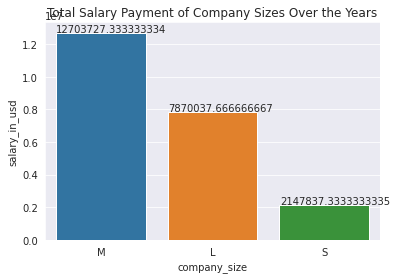

In [60]:
ax = sns.barplot(data=company_sizes, x="company_size", y="salary_in_usd", ci=None)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salary Payment of Company Sizes Over the Years")
plt.show()

From the above we can see that so far so good, Medium sized companies has spent more in salary payment than the Large and Small sized companies.

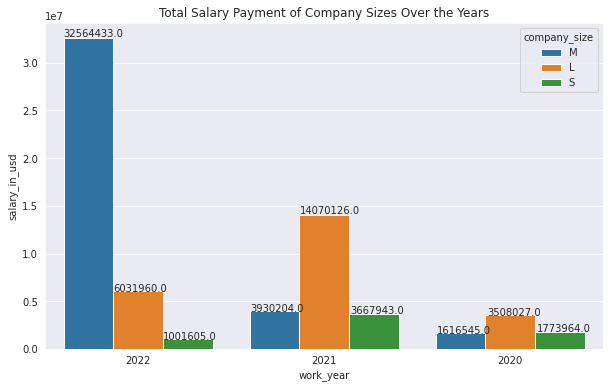

In [61]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=company_sizes, x="work_year", y="salary_in_usd", hue="company_size", ci=None)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Total Salary Payment of Company Sizes Over the Years")
plt.show()

**From the above we can see that:
1. **Medium sized** companies has continually raised the bar in total salary payment over the years. With the most significant increase in the year 2022 fron 2021. The reason for this is not far-fetched: most of our reported company sizes is the Medium. We will see a clearer picture when we take their average payment.
2. **Large sized** companies experienced a sudden drop in salary payment from 2021 to 2022.
3. Similar to the Large sized companies is the **Small sized** companies. However, the drop in the current year is the lowest they have been in all the years.

Now let us proceed to obtain the average across all the company size in all the years.

In [62]:
company_sizes_average= df.groupby(["company_size", "work_year"]).mean().round().reset_index().sort_values(by="salary_in_usd", ascending=False)
company_sizes_average

,company_size,work_year,salary,salary_in_usd,remote_ratio
2,L,2022,319783.0,131130.0,68.0
5,M,2022,134260.0,125731.0,74.0
1,L,2021,714414.0,118236.0,68.0
3,M,2020,159382.0,115468.0,57.0
0,L,2020,540197.0,106304.0,71.0
7,S,2021,507822.0,81510.0,71.0
8,S,2022,78769.0,77047.0,85.0
4,M,2021,203052.0,74155.0,70.0
6,S,2020,298958.0,70959.0,60.0


Now lets show the visual.

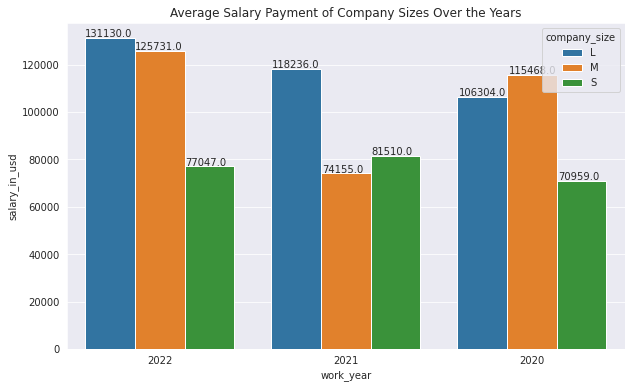

In [63]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=company_sizes_average, x="work_year", y="salary_in_usd", hue="company_size", ci=None)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.title("Average Salary Payment of Company Sizes Over the Years")
plt.show()

**From the above, we can see the true picture:**
1. **Large sized** companies are currently paying the highest salary amount on an average. The Large sized companies has also witness a significant increase in its salary payment unlike the others.
2. **Medium sized** companies are currently the 2nd on the list. However they experienced a sudden in payment in the year 2021 from 2020. Fortunately, they are currently in their all time high salary payments.
3. **Small sized** companies has not had a smooth ride so far so good. They are currently the least paying of all the company sizes. Interestingly, they experienced their all time high in salary payment in the year 2021, but they have not remained the same again in the current year.
    

# Answer to question 6

**A. In terms of Total Salary Payment over the years**
1. In total, the **Medium sized** companies has spent more in salary payment than the Large and Small sized companies. Followed on the list is the **Larged sized** companies while the least is the **Small sized** companies.
3. **Medium sized** companies has continually raised the bar in total salary payment over the years. With the most significant increase in the year 2022 fron 2021. The reason for this is not far-fetched: most of our reported company sizes is the Medium. We will see a clearer picture when we take their average payment.
4. **Large sized** companies experienced a sudden drop in total salary payment from 2021 to 2022.
5. Similar to the Large sized companies is the **Small sized** companies. However, the drop in the current year is the lowest they have been in all the years.

**B. In terms of Average Salary Payment over the years**
1. **Large sized** companies are currently paying the highest salary amount on an average. The Large sized companies has also witness a significant increase in its salary payment unlike the others.
2. **Medium sized** companies are currently the 2nd on the list. However they experienced a sudden in payment in the year 2021 from 2020. Fortunately, they are currently in their all time high salary payments.
3. **Small sized** companies has not had a smooth ride so far so good. They are currently the least paying of all the company sizes. Interestingly, they experienced their all time high in salary payment in the year 2021, but they have not remained the same again in the current year.



# Author's note

Thanks for yout time. Please do well to leave a comment on your thoughts bout this notebook. GRACIAS!